> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pytz  # for today's date
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### This dataset has total 10866 rows and 21 columns.

In [4]:
df.shape

(10866, 21)

### It needs to change the datatype of some columns. Budget, revenue's datatype is int64. So, budget_adj, revenue_adj need to change the same datatype.
#### release_date : object -> datetime
#### budget_adj, revenue_adj : float64 -> int

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Look at the descriptive statistics. This dataset has information of movies( popuarity, budget, revenue, runtime etc) from 1960 to 2015. Some data has 0. Particularily, budget and revenue of movies(over 50%) are  0(include budget_adj, revenue_adj). All most data are between 1960 and 2006. Because there is 0 value for more than half of the budget and revenue, we don't analyze the data accurately from 1960 to 2015. Also, if we drop this data with 0 values, we can't analyze the data because of no enough data. 

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

## Data Cleaning (Replace this with more specific notes!)

### First, remove the duplicated rows.

In [7]:
sum(df.duplicated())

1

In [8]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

#### As you can see the descritive statistics above, movie's budget and revenue have increased from 1960 to 2015. Particularily, the budget's mean is almost same with its 75% value and the revenue's mean(3.982332e+07) is over its 75%(2.400000e+07). So the budget and revenue with 0 value had better put the mean value of 25%~75% section by 2011. If the values of budget and revenue after 2012 are changed, it will have big influence on the total average value.

### So, try to put the mean value of 25%~75% section(mentioned before) into the place that has 0 value the revenue.
#### Before putting the mean value:

In [9]:
revenue_Series = df.describe().revenue
revenue_Series


count    1.086500e+04
mean     3.982690e+07
std      1.170083e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

#### After putting the mean value:

In [10]:
revenue_bin_edges = [ revenue_Series[3], revenue_Series[6], revenue_Series[7]] 
revenue_bin_names = ['revenue_Low', 'revenue_High'] 
df['revenue_levels'] = pd.cut(df['revenue'], revenue_bin_edges, labels=revenue_bin_names, include_lowest=True)
df_revenue_mean = df.groupby('revenue_levels').mean().revenue
df_revenue_mean  
df['revenue'] = np.where(df['revenue']== 0, df_revenue_mean[0], df['revenue'])
df.describe().revenue


count    1.086500e+04
mean     4.096226e+07
std      1.166256e+08
min      2.000000e+00
25%      2.050484e+06
50%      2.050484e+06
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

#### Compare the above two revenue's descriptive statistics. I put the mean budget value of 25%~75% section by 2011 into the budget with 0 value. As the result, 75% and max value weren't changed  and min,25%,50% have values. Also, the mean value slightly increased from 3.982690e+07 to 3.982690e+07. Considering the increasing revenue over time, it can be assumed that relatively little revenue was spent in 1900's and in the early 2000's in this dataset.

### Create the function set_dataFilledMean(data, data_name). 
#### Because budget, budget_adj, revenue_adj can also be considered the same as revenue, I try to use the function set_dataFilledMean(data, data_name).

In [11]:
def set_dataFilledMean(data, data_name):
    desc_Series = df.describe()[data_name]
    print("Before :")
    print(desc_Series)
    bin_edges = [ desc_Series[3], desc_Series[6], desc_Series[7]] 
    print(bin_edges)
    bin_names = [ data_name + '_Low', data_name + '_High'] 
    #print(bin_names)
    df[data_name+'_levels'] = pd.cut(df[data_name], bin_edges, labels=bin_names, include_lowest=True)
    df_mean = df.groupby(data_name+'_levels').mean()[data_name]
    print([df_mean])
    df[data_name] = np.where(df[data_name]== 0, df_mean[0], df[data_name])
    #print(df[data_name])   
    print("After :")
    print(df.describe()[data_name])
    
    # clear parameter
    data = ''
    data_name = ''
    bin_edges = ''
    bin_names = ''
    df_mean = '' 
    
#set_dataFilledMean(df['revenue'], 'revenue')
set_dataFilledMean(df['budget'], 'budget') 
set_dataFilledMean(df['revenue_adj'], 'revenue_adj')
set_dataFilledMean(df['budget_adj'], 'budget_adj')

Before :
count    1.086500e+04
mean     1.462429e+07
std      3.091428e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64
[0.0, 15000000.0, 425000000.0]
[budget_levels
budget_Low     1.900623e+06
budget_High    5.300694e+07
Name: budget, dtype: float64]
After :
count    1.086500e+04
mean     1.562069e+07
std      3.045403e+07
min      1.000000e+00
25%      1.900623e+06
50%      1.900623e+06
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64
Before :
count    1.086500e+04
mean     5.136900e+07
std      1.446383e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.370173e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64
[0.0, 33701729.0094642, 2827123750.41189]
[revenue_adj_levels
revenue_adj_Low     2.831740e+06
revenue_adj_High    1.969987e+08
Name: revenue_adj, dtype: float64]
After :
count    1.086500e+04
mean     5.293695e+07
std    

#### As you can see, budget, budget_adj, revenue_adj seem to have same result. 75% and max value are not changed. Mean value are slightly increased and there is no significant difference in standard deviation.

### Look at missing data through the info() of dataframe. 
#### As I have seen, total count of data is 10866. Particularly the columns, homepage/tagline/keyword, are significantly different with the totla count(10866). Look at the columns closely,  these columns are not associated with the revenue. Now I need to think that which data is associated with the revenue. So, it need to drop the columns not to be associated with the revenue.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 25 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null float64
revenue                 10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj           

### Drop the below columns  not to be associated with the revenues. I think genres, casted actor/actress are basically associated with the revenue. So I try to make the accurate genres, cast columns.
### Limitation : Which properties are associated with the revenue? genres, cast
#### 1. The too detailed datas : id, imdb_id, budget_adj, revenue_adj
#### 2. Not associated with revenues but the preference of users : homepage, tagline, keywords, overview 
#### 3. Inaccurate data(specific rating meaning from level 1 to 9) : vote_count, vote_average
#### 4. Not related to the limitation : production_companies
#### 5. The category columns no longer needed :  the category columns named with '_level

In [13]:
df.drop(['id','imdb_id','homepage','tagline','overview','keywords','production_companies','vote_count','vote_average',
         'budget_adj','revenue_adj','revenue_levels','budget_levels','revenue_adj_levels','budget_adj_levels'],
        axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10865 non-null float64
budget            10865 non-null float64
revenue           10865 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
release_year      10865 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 933.7+ KB


In [15]:
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,0.646446,1.562069e+07,4.096226e+07,102.071790,2001.321859
std,1.000231,3.045403e+07,1.166256e+08,31.382701,12.813260
min,0.000065,1.000000e+00,2.000000e+00,0.000000,1960.000000
25%,0.207575,1.900623e+06,2.050484e+06,90.000000,1995.000000
50%,0.383831,1.900623e+06,2.050484e+06,99.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


#### There are null values in cast, director, genres columns. 

### Check the missing data in 'cast' column.

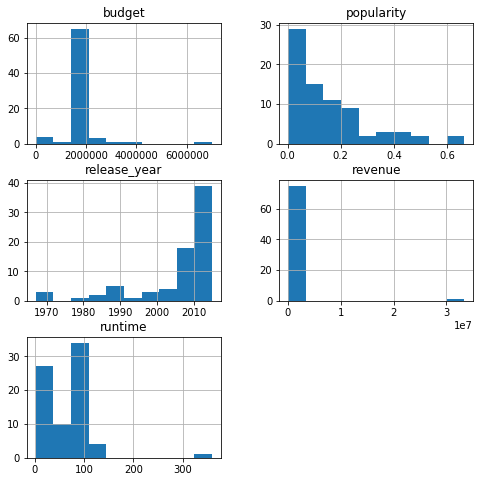

In [16]:
df[df.cast.isnull()].hist(figsize=(8,8));

#### The cast column with null value usually means that their popularities are low and the movie times are short, also they have mean budget(applied with the mean of min~50% section). Also, the revenue is closer to 0. So, it had better drop the missing data of cast.

### Check the missing data in 'director' column.

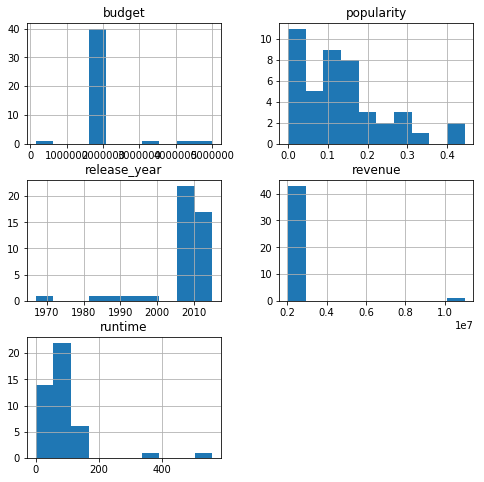

In [17]:
df[df.director.isnull()].hist(figsize=(8,8));

#### The director column with null value usually means that the movie times are short and they have mean budget(applied with the mean of min~50% section). Also, the revenue is closer to 0.  So, it had better drop the missing datas.


###  Check the missing data in 'genres' column.

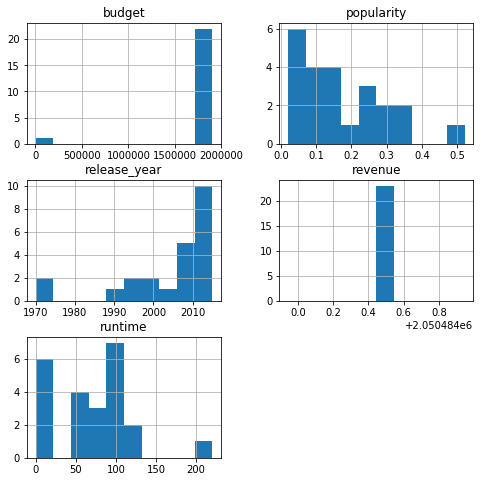

In [18]:
df[df.genres.isnull()].hist(figsize=(8,8));

#### The genres column with null values doesn't have constant running time even over 200 minutes. Their budget has the mean budget(applied with the mean of min~50% section). Also, the revenue is closer to the mean value. Some datas of them have much lower popularity than the max value(32). Even the value of 75% of popularity is 0.7. So they will be drop.

In [19]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10731 non-null float64
budget            10731 non-null float64
revenue           10731 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
release_year      10731 non-null int64
dtypes: float64(3), int64(2), object(5)
memory usage: 922.2+ KB


In [20]:
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000
mean,0.652615,1.579159e+07,4.144497e+07,102.468829,2001.259622
std,1.004804,3.060482e+07,1.172706e+08,30.493873,12.820151
min,0.000188,1.000000e+00,2.000000e+00,0.000000,1960.000000
25%,0.210765,1.900623e+06,2.050484e+06,90.000000,1995.000000
50%,0.387081,1.900623e+06,2.050484e+06,99.000000,2006.000000
75%,0.720889,1.600000e+07,2.500000e+07,112.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


### Make The popularity the 2 decimal places.

##### Reference : https://docs.scipy.org/doc/numpy/reference/generated/numpy.around.html?highlight=around#numpy.around

In [21]:
df.head().popularity

0    32.985763
1    28.419936
2    13.112507
3    11.173104
4     9.335014
Name: popularity, dtype: float64

#### Popularity is score for preference of user. For easy understanding, make The popularity the 2 decimal places.

In [22]:
df['popularity'] = np.around(df['popularity'],2)
df.head().popularity

0    32.99
1    28.42
2    13.11
3    11.17
4     9.34
Name: popularity, dtype: float64

### Create the function: get_todaydate(seg)
#### This function returns today's date.
#### * parameter :  year, month, day, time
#### * return : today's year, month, day, time

In [23]:
def get_todaydate(seg):
    today_date = datetime.datetime.now(pytz.timezone('US/Pacific'))
    if seg == 'year':
        return today_date.year
    elif seg == 'month':
        return today_date.month
    elif seg == 'day':
        return today_date.day
    elif seg == 'time':
        return today_date.time()

### Create the function: get_dateformat(time_series)
#### This function changes the format of date. also check the 1900s and 2000s.
#### * parameter : time data Series, seperator(Y,M,D)
#### * return : tiem data Series changed (ex, 2019, 2019-05, 2019-05-15)
##### Reference :  https://stackoverflow.com/questions/53403318/make-datetime-series-from-separate-year-month-and-date-columns-in-pandas/53403472#53403472
##### Reference : https://stackoverflow.com/questions/47227010/python-to-date-wrong-values

In [24]:
def  get_dateformat(time_data, sep):
    df_date = pd.to_datetime(time_data)
    
    # present year
    present_year = get_todaydate('year')

    # year
    df_year = df_date.dt.year
    df_date = df_date.mask(df_year > present_year, df_date - pd.Timedelta(100, unit='Y'))
    df_date = df_date.dt.to_period(sep)
    return df_date

In [25]:
df['release_date'] = get_dateformat(df['release_date'], 'D')
df.tail()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
10861,0.08,1.900623e+06,2.050484e+06,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,1966-06-15,1966
10862,0.07,1.900623e+06,2.050484e+06,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,1966-12-21,1966
10863,0.07,1.900623e+06,2.050484e+06,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,1966-01-01,1966
10864,0.06,1.900623e+06,2.050484e+06,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,1966-11-02,1966
10865,0.04,1.900000e+04,2.050484e+06,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,1966-11-15,1966


### The columns (cast, genres) consist of multiple values. So, Split the columns' values with segment and create the datasets (df_cast, df_genres)
#####  reference : https://stackoverflow.com/questions/52133164/pandas-how-to-plot-the-imdb-movie-total-budget-versus-the-separate-genre-in-pan


### Create the function : get_seperatedRows(data_series, seperator)
#### This function divides the one row whose data has multivalue consisting of seperator(ex: |, ;, :, # etc) into serveral rows.
#### * parameter : data series , seperator(ex: |, ;, :, # etc)
#### * return : dataframe with seperated values

In [26]:
def get_seperatedRows(data_series, name, sep):
    df_seperated = data_series.str.split(sep, expand=True).stack().to_frame(name = name)
    df_seperated.index = df_seperated.index.droplevel(1)
    return df_seperated

In [27]:
df_genres_details = get_seperatedRows(df['genres'], 'genres', '|')
df_genres = df.join(df_genres_details, lsuffix='_all', rsuffix='_seg')
df_genres.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres_all,release_date,release_year,genres_seg
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Action
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Adventure
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Science Fiction
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Thriller
1,28.42,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,Action


In [28]:
# df_cast
df_cast_detail = get_seperatedRows(df['cast'], 'cast', '|')
df_cast = df.join(df_cast_detail, lsuffix='_origin', rsuffix='_seg')
df_cast.head()


,popularity,budget,revenue,original_title,cast_origin,director,runtime,genres,release_date,release_year,cast_seg
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Chris Pratt
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Bryce Dallas Howard
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Irrfan Khan
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Vincent D'Onofrio
0,32.99,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Nick Robinson


### I completed the dataframes I need. :  df_cast, df_genres

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1. Which genres are most popular from year to year?
#### Create the dataframe for genres grouped by year and then rank for popularity.
##### Reference : https://stackoverflow.com/questions/49561140/keyerror-while-trying-to-plot-a-pandas-pivot-table
##### Reference : https://stackoverflow.com/questions/42854598/pandas-dataframe-set-index-with-inplace-true-returns-a-nonetype-why

### Create id for each genre.

In [29]:
genre_names = df_genres.groupby('genres_seg').count().index
genre_names[0]
id_list = []
# Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
#'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
#'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
df_genres.head()

for i in df_genres['genres_seg']:
    if i == genre_names[0]:  #Action
        id_list.append('1')
    elif i == genre_names[1]: # Adventure
        id_list.append('2')
    elif i == genre_names[2]:  #Animation
        id_list.append('3')
    elif i == genre_names[3]:  # Comedy
        id_list.append('4')
    elif i == genre_names[4]:  # Crime
        id_list.append('5')
    elif i == genre_names[5]:  # Documentary
        id_list.append('6')        
    elif i == genre_names[6]:  # Drama
        id_list.append('7')
    elif i == genre_names[7]:  #Family
        id_list.append('8')        
    elif i == genre_names[8]:  #Fantasy
        id_list.append('9')
    elif i == genre_names[9]:  #Foreign
        id_list.append('10')
    elif i == genre_names[10]:  #History
        id_list.append('11')
    elif i == genre_names[11]:  #Horror
        id_list.append('12')
    elif i == genre_names[12]:  #Music
        id_list.append('13')
    elif i == genre_names[13]:  #Mystery
        id_list.append('14')
    elif i == genre_names[14]:  #Romance
        id_list.append('15')
    elif i == genre_names[15]:  #Science Fiction
        id_list.append('16')
    elif i == genre_names[16]:  #TV Movie
        id_list.append('17')
    elif i == genre_names[17]:  #Thriller
        id_list.append('18')
    elif i == genre_names[18]:  #War
        id_list.append('19')
    elif i == genre_names[19]:  #Western
        id_list.append('20')
df_genres['genres_id'] = id_list   
df_genres

,popularity,budget,revenue,original_title,cast,director,runtime,genres_all,release_date,release_year,genres_seg,genres_id
0,32.99,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Action,1
0,32.99,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Adventure,2
0,32.99,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Science Fiction,16
0,32.99,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,Thriller,18
1,28.42,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,Action,1
1,28.42,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,Adventure,2
1,28.42,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,Science Fiction,16
1,28.42,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,Thriller,18
2,13.11,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,Adventure,2
2,13.11,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,Science Fiction,16


In [30]:
grouped_genres = df_genres.groupby(['release_year','genres_seg','genres_id'])['popularity'].mean().to_frame()
#grouped_genres_ordered = grouped_genres.sort_values(['release_year', 'popularity','genres_id'], ascending=False)
#pivot = grouped_genres.pivot_table(index=['release_year','genres_seg','genres_id'], aggfunc='max')['popularity'].to_frame()

grouped_genres['rank'] = grouped_genres.groupby('release_year')['popularity'].rank(ascending=0)
grouped_genres['rank'] = grouped_genres['rank'].astype(int)
grouped_genres_rank = grouped_genres[grouped_genres['rank'] == 1]
grouped_genres_rank.head(15)

,,,popularity,rank
release_year,genres_seg,genres_id,,
1960,Thriller,18,0.810000,1
1961,Animation,3,2.630000,1
1962,Adventure,2,0.942857,1
1963,Animation,3,2.180000,1
1964,War,19,0.933333,1
1965,Music,13,0.965000,1
1966,Animation,3,0.586667,1
1967,Animation,3,2.550000,1
1968,Mystery,14,1.517500,1


#### Look at the above dataframe. There are duplicated data, 1971.
#### Family and Fantasy in 1971 are associated with family genres. So I think it doesn't matter to drop this duplicated data. 

In [31]:
sum(grouped_genres_rank.duplicated())
grouped_genres_rank[grouped_genres_rank.duplicated()]

,,,popularity,rank
release_year,genres_seg,genres_id,,
1971,Fantasy,9,1.53,1


In [32]:
grouped_genres_rank.drop_duplicates(inplace=True)
sum(grouped_genres_rank.duplicated())

C:\Users\parnx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0

In [33]:
grouped_genres_rank.head(15)

,,,popularity,rank
release_year,genres_seg,genres_id,,
1960,Thriller,18,0.810000,1
1961,Animation,3,2.630000,1
1962,Adventure,2,0.942857,1
1963,Animation,3,2.180000,1
1964,War,19,0.933333,1
1965,Music,13,0.965000,1
1966,Animation,3,0.586667,1
1967,Animation,3,2.550000,1
1968,Mystery,14,1.517500,1


### Now, visualize the most popular genres from year to year. But this dataframe has multiindex and also the data for x axis, y axis are in the index. So seperate the data of this index into each columns for visualizing. First, Copy the dataframe 'grouped_genres_rank' and then make the new columns consisted of index data(year, genre).

In [34]:
grouped_genres_rank_copy = grouped_genres_rank.copy()

In [35]:
length = len(grouped_genres_rank.index) # 56
level = len(grouped_genres_rank.index.levels) # 3

year_list = []
genres_list = []
id_list = []

for i in range(length):
    for k in range(level):
        if k == 0:
            year_list.append(grouped_genres_rank.index[i][k])
        elif k == 1:
            genres_list.append(grouped_genres_rank.index[i][k])
        else:
            id_list.append(grouped_genres_rank.index[i][k])

grouped_genres_rank_copy['year'] = year_list
grouped_genres_rank_copy['genre'] = genres_list
grouped_genres_rank_copy['genre_id'] = id_list
grouped_genres_rank_copy

,,,popularity,rank,year,genre,genre_id
release_year,genres_seg,genres_id,,,,,
1960,Thriller,18,0.810000,1,1960,Thriller,18
1961,Animation,3,2.630000,1,1961,Animation,3
1962,Adventure,2,0.942857,1,1962,Adventure,2
1963,Animation,3,2.180000,1,1963,Animation,3
1964,War,19,0.933333,1,1964,War,19
1965,Music,13,0.965000,1,1965,Music,13
1966,Animation,3,0.586667,1,1966,Animation,3
1967,Animation,3,2.550000,1,1967,Animation,3
1968,Mystery,14,1.517500,1,1968,Mystery,14


#### Change the genre_id's datatype string to integer for the y-axis of chart.

In [36]:
grouped_genres_rank_copy.genre_id.dtype
grouped_genres_rank_copy['genre_id'] = grouped_genres_rank_copy['genre_id'].astype(int)
grouped_genres_rank_copy.genre_id.dtype

dtype('int32')

### Visualize the most popular genres from year to year.(using plt.scatter())
#### Replace y-axis integer with string
##### Reference: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xticks#yticks

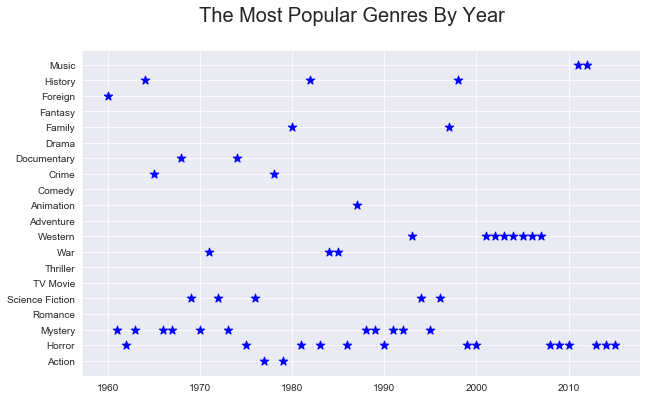

In [37]:
year = grouped_genres_rank_copy['year']
genre_id = grouped_genres_rank_copy['genre_id']
len(genre_id)

# plotting
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(x=year, y=genre_id, label='the most', s=80, color='b', marker="*")
#plt.legend(['point'], loc='right')
plt.suptitle('The Most Popular Genres By Year', fontsize = 20)

# replace y-axis integer with string.
genre = grouped_genres_rank.index.levels[1] # 20 ea
genre_id = grouped_genres_rank.index.levels[2].astype(int) # 20 ea
#           location, labels, rotation=45 
plt.yticks( genre_id, genre, rotation = 0)
plt.show() 

#### Visualize the most popular genres from year to year.(using sns.stripplot)

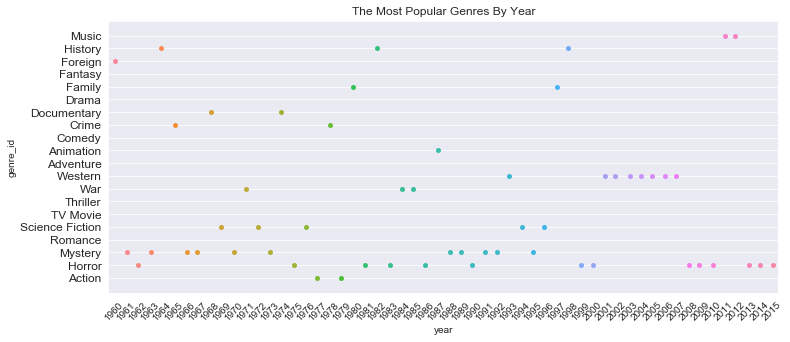

In [39]:
plt.figure(figsize=(12,5))
sns.stripplot(x="year", y="genre_id", data=grouped_genres_rank_copy).set_title("The Most Popular Genres By Year")

# replace y-axis integer with string.
genre = grouped_genres_rank.index.levels[1] # 20 ea
genre_id = grouped_genres_rank.index.levels[2].astype(int) # 20 ea
#           location, labels, rotation=45 
plt.yticks( genre_id, genre, rotation = 0, fontsize = 12)
plt.xticks(rotation = 45, fontsize = 10)
plt.show() 

### Q2. What kinds of properties are associated with movies that have high revenues?
#### I guess Movie genres, Casted Actor/Actress are associated with the high revenues.  So,I created df_cast, df_genre.

### Q2-1. Cast is associated with the revenue?
#### First, I think the famous actor/actress has the high revenues. There are so many actor/actress in here. Total is 18930 person. So I have limitation in order of the highest number of apperances. The Actor/Actress whose the number of movie appearances is high is famous, and then analysis their revenues.
#### Limitation : Cast whose the higher number of movie appearances

In [40]:
df_cast.head()
#Number of movie appearances,
df_cast_num = df_cast.groupby('cast_seg')['original_title'].count().to_frame()
df_cast_num.shape

(18930, 1)

#### Check the revenues per Actor/Actress. The mean of appearances is 2.764606 and max value is 72.0. It's large difference with mean and max. I think the higher appearances the more famous. So, It needs that famous actor/actress who have the number of times as much as possible. Moreover, there is no mean that compare once a number of appearance(1) with 72 times. (Once a number of appearance is more than 50%.)
#### So I divided 75% ~ max section into a quartile over and over until I find higher appearance times . 

In [41]:
df_cast_num.describe()

,original_title
count,18930.000000
mean,2.764606
std,4.747105
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,72.000000


### Create the function : get_recursive(df, value)
### This is recursive function to get a range of 75% and max over and over,  
#### * parameter : dataframe, value
#### * return  : get_recursive(df, value)

In [42]:
appearance_list = ['Appearance']
count_list = ['Actors']

def get_recursive(df, value): 
    df_call = df[df.original_title > value].describe()
    sub_value = df_call['original_title'][6]
    sub_count = df_call['original_title'][0]
    appearance_list.append(sub_value)
    count_list.append(sub_count)
    
    if sub_value > 70:
        return appearance_list, count_list
    
    return get_recursive(df,sub_value)

value = df_cast_num.describe()['original_title'][6] #2
appearance_list.append(value)
get_recursive(df_cast_num, value)
# make the dictionary

criteria = dict(zip(appearance_list, count_list))
criteria

{'Appearance': 'Actors',
 2.0: 4344.0,
 9.0: 1084.0,
 23.0: 247.0,
 37.0: 54.0,
 46.0: 13.0,
 61.0: 3.0}

#### Look at the above the dataset.The fifth element(the number of appearance is 46 and the number of actors is 13) is good for analyzing. The number 37  is about twice the maximum value,72. It is better to compare the revenues of actor/actress who do not make a big difference in the number of appearances. Also, the number of actors,13 is enough good number for comparing the revenue each other.
### Limitation : The revenue of 13 actor/actress who appeared more than 46.
#### After sorting in descending order of appearance times, select top 13 actors. 

In [43]:
df_cast_ordered = df_cast_num.sort_values(by=['original_title'], ascending=False)
top_members = criteria.get(46).astype(int) # 13
casted_top = df_cast_ordered.head(top_members)
casted_top


,original_title
cast_seg,
Robert De Niro,72
Samuel L. Jackson,71
Bruce Willis,62
Nicolas Cage,61
Michael Caine,53
Robin Williams,51
John Cusack,50
John Goodman,49
Morgan Freeman,49


### Create the function : get_locations(num)
#### This function create the list as a given number.
#### parameter : num
#### return list

In [44]:
def get_locations(num):
    locations = []
    for i in range(num):
        locations.append(i+1)
        i += 1
    return locations
    

,original_title
cast_seg,
Robert De Niro,72
Samuel L. Jackson,71
Bruce Willis,62
Nicolas Cage,61
Michael Caine,53
Robin Williams,51
John Cusack,50
John Goodman,49
Morgan Freeman,49


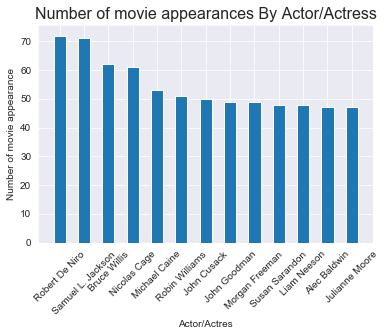

In [77]:
locations = get_locations(top_members)

#locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
heights = casted_top.original_title
labels = casted_top.index

plt.setp(plt.xticks()[1], rotation=45)
plt.bar(locations, heights, width = 0.5, tick_label = labels)
plt.title('Number of movie appearances By Actor/Actress', fontsize = 16)
plt.xlabel('Actor/Actres')
plt.ylabel('Number of movie appearance');

casted_top

### Select the revenues of the top 13 actor/actress. 

In [72]:
casted_revenue = df_cast.groupby('cast_seg')['revenue'].mean().to_frame()
df_top_revenue = casted_revenue.join(casted_top, lsuffix='', rsuffix='_count', how='right')
df_top_revenue['revenue'] = df_top_revenue['revenue'].astype(int)
df_top_revenue_ordered = df_top_revenue.sort_values(by='revenue', ascending=False)
df_top_revenue_ordered

,revenue,original_title
cast_seg,,
Liam Neeson,115721265,48
Robin Williams,114113764,51
Bruce Willis,106368576,62
Michael Caine,102119797,53
Samuel L. Jackson,100070273,71
Morgan Freeman,85440202,49
Nicolas Cage,80281085,61
John Goodman,80267162,49
Robert De Niro,71541826,72


### Check the mean of the cast. 
#### Express mean line on the chart to see whether his revenue is higher than the total mean of all cast.

In [73]:
total_mean_value = df_cast.revenue.mean()
total_mean_value  # 42433577.71513429


42433577.71513429

#### The mean value of top 13

In [74]:
top13_mean_value = df_top_revenue.revenue.mean()    # 78639773.3076923
top13_mean_value   # 78639773.3076923

78639773.3076923

#### Then Visualize to check whether the data is higher than the mean revenue of all cast and the top 13 members. And add mean value on y-axis.
##### Reference : https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib

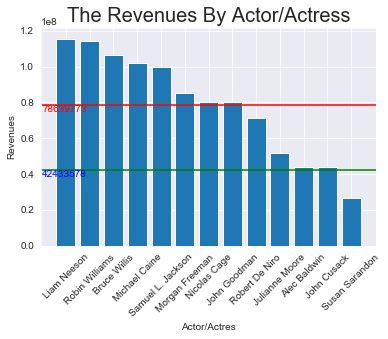

In [76]:
#locations = [1,2,3,4,5,6,7,8,9,10,11,12,13]
locations
heights = df_top_revenue_ordered.revenue
labels = df_top_revenue_ordered.index

fig, ax = plt.subplots()
plt.bar(locations, heights, tick_label = labels)
ax.axhline(y=total_mean_value, color="green")
ax.axhline(y=top13_mean_value, color="red")
ax.text(0,total_mean_value, "{:.0f}".format(total_mean_value), color="blue", ha="left", va="top")
ax.text(0,top13_mean_value, "{:.0f}".format(top13_mean_value), color="red", ha="left", va="top")
#plt.axhline(y=total_mean_value, color='#d62728')
#plt.axhline(y=top13_mean_value, color='#a99925')
plt.setp(plt.xticks()[1], rotation=45)
plt.title('The Revenues By Actor/Actress', fontsize = 20)
plt.xlabel('Actor/Actres')
plt.ylabel('Revenues');

### Q2-2. Genres are associated with the revenue?
####  Secound, I wonder which genres has the most revenue. So, select the genres that has higher revenues than the mean. 
#### Each genre has different number of screenings and has different revenues. So, divide the total revenues of each genres into the total count of screenings.

#### Check the number of screenings of the each genres. 

In [79]:
df_genres_result = df_genres.groupby('genres_seg')['original_title'].count().to_frame()
df_genres_result.describe()

,original_title
count,20.000000
mean,1337.650000
std,1259.850587
min,162.000000
25%,381.750000
50%,1061.000000
75%,1654.000000
max,4746.000000


#### The total genres are 20. Each genre has mean number of screenings, 1338(1337.65). I want to analyze the genres related with family, children. So, Adventure, Animation,Comedy,Family, Fantasy seem to be related with family and children.
### Limitation :Genres related with family : Adventure, Animation,Comedy, Family, Fantasy 
#### Check the mean revenue of each genres.

In [80]:
df_genres_result['revenue'] = df_genres.groupby('genres_seg')['revenue'].mean()
df_genres_result['revenue'] = df_genres_result['revenue'].astype(int)
df_genres_result

,original_title,revenue
genres_seg,,
Action,2376,74002938
Adventure,1465,114471805
Animation,664,80541482
Comedy,3775,38791326
Crime,1353,43278971
Documentary,470,3809987
Drama,4746,30385352
Family,1214,74631490
Fantasy,908,98171670


### Visualize which genres of family movies has the highest revenues.
#### The mean revenue of the all genres

In [81]:
mean_value = df_genres.revenue.mean()
mean_value

48879778.83622551

#### Check the genres with higher than mean value. So show the line for the mean value and add mean value on y-axis.

,original_title,revenue
genres_seg,,
Adventure,1465,114471805
Fantasy,908,98171670
Animation,664,80541482
Family,1214,74631490
Comedy,3775,38791326


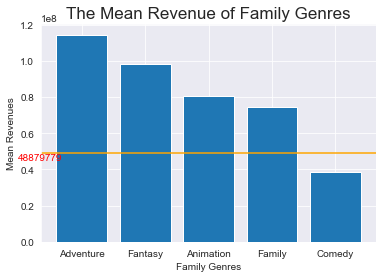

In [83]:
family_list = ['Adventure','Animation','Comedy','Family','Fantasy']
df_family_genres = df_genres_result[df_genres_result.index.isin(family_list)]
df_family_genres_ordered = df_family_genres.sort_values(['revenue'], ascending=False)

locations = get_locations(len(family_list))
heights = df_family_genres_ordered.revenue
labels = df_family_genres_ordered.index

fig, ax = plt.subplots()
plt.bar(locations, heights, tick_label = labels)
ax.axhline(y=mean_value, color="orange")
ax.text(0,mean_value, "{:.0f}".format(mean_value), color="red", ha="left", va="top")
#plt.axhline(y=mean_value, color='#c86321')
plt.title('The Mean Revenue of Family Genres', fontsize = '17')
plt.xlabel('Family Genres')
plt.ylabel('Mean Revenues');

df_family_genres_ordered

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## Q1. Which genres are most popular from year to year?
#### C1. In 1900s, various genres were generally popular. History, war, SF, mystery and horror genres. Particularly, mystery and horror were mostly popular. In 2000s, western and horror genres were remarkably popular. If you look at the whole section(from 1960 to 2015), horror genre has been steadily popular.



## Q2. What kinds of properties are associated with movies that have high revenues?
#### I thought the genres and casted actor/actress are very associated with the revenue first. Because we wonder the actor/actoress of the movies and which genres of the movies when a movie is released. So I found the top 13 actor/actress and then analyzied their revenue.
### Q2-1. Cast is associated with the revenue?
#### Conclusion 2-1. The Actor/Actress whose the number of movie appearances is high have high revenues.  The mean revenue of the top 13 is 78639773 and the mean revenue of all cast is 42433577. Look at the plot below. The mean of the top 13 is yellow line and the mean of all cast is red line. First, The mean revenue of the top 13 is almost twice revenue of all cast. And the number of members with lower revenue than all cast's mean(red line) is 1. So the actor/actress whose number of appearances is high has the higher revenue. Also, they are all famous. 
### Q2-2. Genres are associated with the revenue?
#### Conclusion 2-2. The number of all genres is 20 and the number of genres associated with family is 5. Those are Adventure, Animation, Comedy, Family, Fantasy. So I limited the range to family genres for comparison between related data. Total mean revenue of all genres is 48879779(brown line). The number of family genres with higher than the mean(brown line) is 4 (Adventure, Animation,Family, Fantasy). Their revenue has much higher revenue. So, most family genres are very associated with the higher revenue. 